In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd

from datetime import datetime
from dateutil.relativedelta import *
from matplotlib.dates import DateFormatter
from matplotlib.ticker import AutoMinorLocator
from notebook_utils import configure_path, setup_matplotlib

In [2]:
configure_path()
setup_matplotlib()

## RIPE Atlas' Footprint in Latin America

The coverage of RIPE Atlas in Venezuela is important in our ca- pacity to detect root DNS servers deployed and operational in the country. To determine whether limited coverage could skew our observations, we now analyze the RIPE Atlas network’s presence and evolution within Venezuela over time.

We examine the coverage of RIPE Atlas in LACNIC region through recurrent CHOAS TXT built-in measurements to all root DNS.

In [3]:
def str2dt(t):
    return datetime.strptime(t[:-2] + "01", "%Y-%m-%d %H:%M:%S")

In [4]:
probes = pd.read_csv("data/processed/17-ripe-probes/probes_count.csv")
probes["date"] = probes["date"].map(str2dt)

In [5]:
probes.head()

,date,cc,probes_count
0,2016-01-01 00:00:01,AR,46
1,2016-01-01 00:00:01,AW,0
2,2016-01-01 00:00:01,BZ,2
3,2016-01-01 00:00:01,BO,3
4,2016-01-01 00:00:01,BQ,0


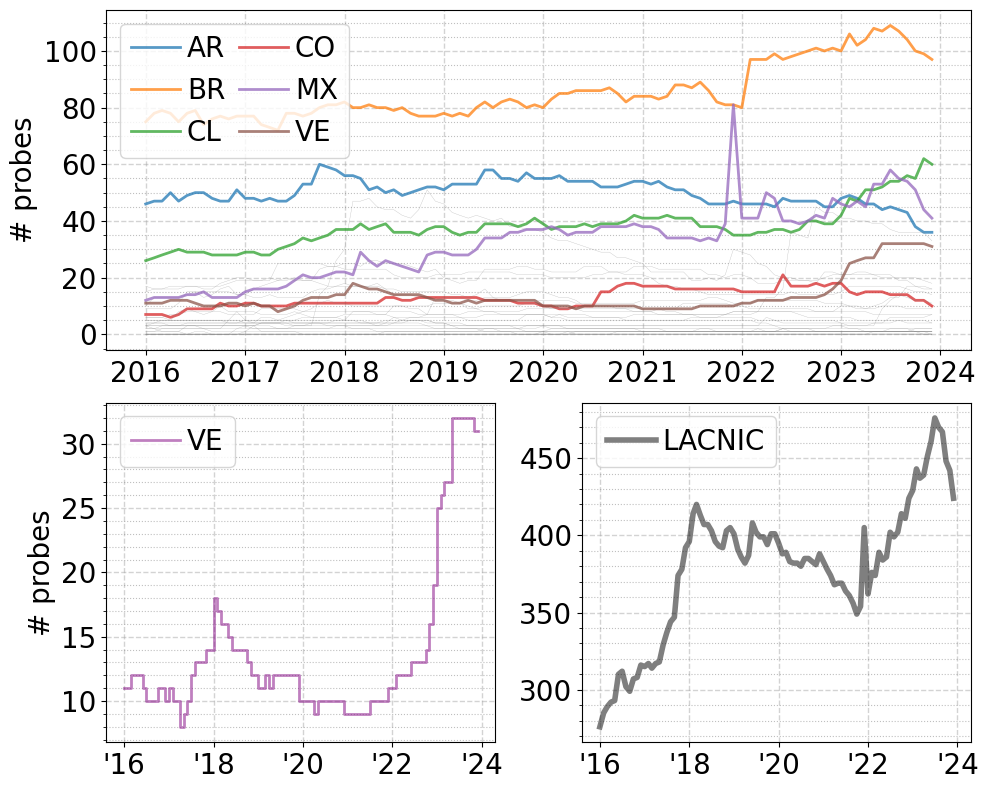

In [6]:
fig = plt.figure(figsize=(10, 8))

gs = fig.add_gridspec(2, 2)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

i = 0
for cc in probes.drop_duplicates("cc")["cc"].values:
    tmp = probes.loc[probes["cc"] == cc]
    if cc in ["AR", "BR", "MX", "CL", "CO", "VE"]:
        ax1.plot_date(
            tmp["date"],
            tmp["probes_count"],
            label=f"{cc}",
            xdate=True,
            ydate=False,
            tz="UTC",
            alpha=0.75,
            lw=2,
            fmt="-",
            marker="None",
            color=f"C{i}",
        )

        i += 1
    else:
        ax1.plot_date(
            tmp["date"],
            tmp["probes_count"],
            xdate=True,
            ydate=False,
            tz="UTC",
            alpha=0.5,
            lw=0.25,
            fmt="-",
            marker="None",
            color=f"grey",
        )

ax1.set_ylabel("# probes", fontsize=20)
ax1.tick_params(labelsize=20)
ax1.legend(
    loc="upper left",
    ncol=2,
    frameon=True,
    fontsize=20,
    handletextpad=0.25,
    columnspacing=0.5,
    handlelength=1.75,
)

ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.grid(True, linestyle="--", color="darkgrey", lw=1, alpha=0.5, which="major")
ax1.xaxis.grid(True, linestyle="--", color="darkgrey", lw=1, alpha=0.5, which="major")

ax1.yaxis.grid(True, linestyle=":", color="grey", alpha=0.5, which="minor")
ax1.xaxis.grid(True, linestyle=":", color="grey", alpha=0.5, which="minor")

###
tmp = probes.loc[probes["cc"] == "VE"]

ax2.plot_date(
    tmp["date"],
    tmp["probes_count"],
    xdate=True,
    ydate=False,
    tz="UTC",
    alpha=0.5,
    lw=2,
    fmt="-",
    marker="None",
    color=f"purple",
    label=f"VE",
    drawstyle="steps-pre",
)

ax2.set_ylabel("# probes", fontsize=20)
ax2.tick_params(labelsize=20)
ax2.legend(
    loc="upper left",
    ncol=2,
    frameon=True,
    fontsize=20,
    handletextpad=0.25,
    columnspacing=0.5,
    handlelength=1.75,
)

ax2.yaxis.grid(True, linestyle="--", color="darkgrey", lw=1, alpha=0.5, which="major")
ax2.xaxis.grid(True, linestyle="--", color="darkgrey", lw=1, alpha=0.5, which="major")

ax2.yaxis.grid(True, linestyle=":", color="grey", alpha=0.5, which="minor")
ax2.xaxis.grid(True, linestyle=":", color="grey", alpha=0.5, which="minor")

ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.xaxis.set_major_formatter(DateFormatter("'%y"))
ax2.xaxis.set_major_locator(mdates.YearLocator(2))
###
tmp = probes.groupby("date")["probes_count"].sum().reset_index()

ax3.plot_date(
    tmp["date"],
    tmp["probes_count"],
    xdate=True,
    ydate=False,
    tz="UTC",
    alpha=0.5,
    lw=4,
    fmt="-",
    marker="None",
    color=f"black",
    label=f"LACNIC",
)

ax3.tick_params(labelsize=20)
ax3.legend(
    loc="upper left",
    ncol=2,
    frameon=True,
    fontsize=20,
    handletextpad=0.25,
    columnspacing=0.5,
    handlelength=1.75,
)

ax3.yaxis.grid(True, linestyle="--", color="darkgrey", lw=1, alpha=0.5, which="major")
ax3.xaxis.grid(True, linestyle="--", color="darkgrey", lw=1, alpha=0.5, which="major")

ax3.yaxis.grid(True, linestyle=":", color="grey", alpha=0.5, which="minor")
ax3.xaxis.grid(True, linestyle=":", color="grey", alpha=0.5, which="minor")

ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.xaxis.set_major_formatter(DateFormatter("'%y"))
ax3.xaxis.set_major_locator(mdates.YearLocator(2))

fig.subplots_adjust(hspace=0)
fig.tight_layout()
fig.savefig("figures/17-ripe_probes_count.pdf")

The figure shows the monthly evolution of the number of probes in each country involved in these measurements. The top panel offers a comparative view of the probe count in Venezuela against other LACNIC countries, with comparable peers emphasized in bright colors. The bottom-left panel exclusively focuses on Venezuela, while the bottom-right panel aggregates and displays the total number of probes across all countries in the region.

As the analysis reveals, Venezuela has one of the best coverages in Latin America despite facing challenges in maintaining network metrics comparable to the rest of the region. Notably, visibility has been significantly increased, with the number of probes in Venezuela rising from 10 to 30 in just the last few years. Given this extensive coverage, we assume that the lack of visibility of previously available root DNS servers in Venezuela is not due to a lack of coverage by the RIPE Atlas platform.